In [11]:
import pandas as pd
from statsmodels.tsa.api import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../Datasets/500820.csv')
y_train = df['Close Price'].iloc[:-12]
y_test = df['Close Price'].iloc[-12:]

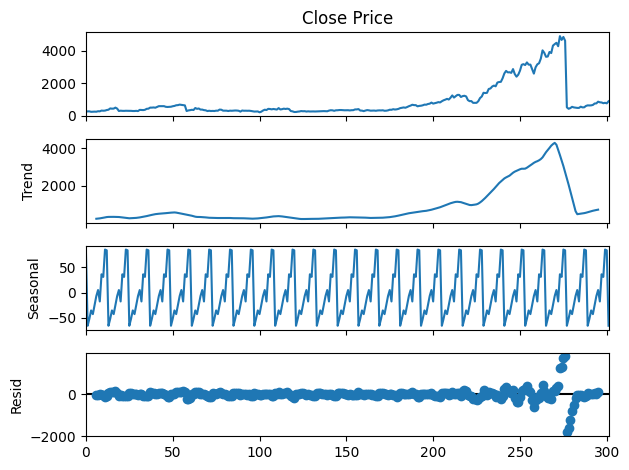

In [14]:
series = y_train
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

USING HOLD BOTH

In [ ]:
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error
from ipywidgets import widgets

alpha = 0.8
beta = 0.02

def holt_both(alpha, beta, expo):
    holt = Holt(y_train, exponential=expo)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast1.plot(color='purple', label='Forecast')
    rsme = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RSME: {rsme}, alpha={alpha}, beta={beta}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(holt_both, alpha=(0.01,1,0.01), beta=(0.01, 1, 0.01), expo=[True,False])



interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, expo)>

Beer Production time series

In [35]:
df = pd.read_csv('../Datasets/monthly-beer-production-in-austr.csv', index_col=0)
y_train = df['Monthly beer production'].iloc[:-12]
y_test = df['Monthly beer production'].iloc[-12:]

from statsmodels.tsa.seasonal import seasonal_decompose



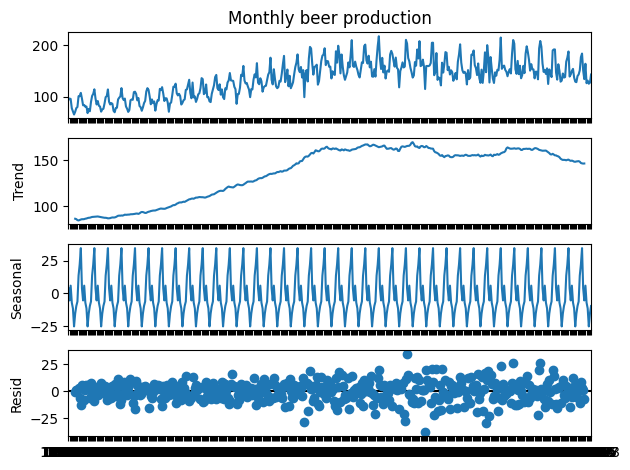

In [36]:
series = y_train
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

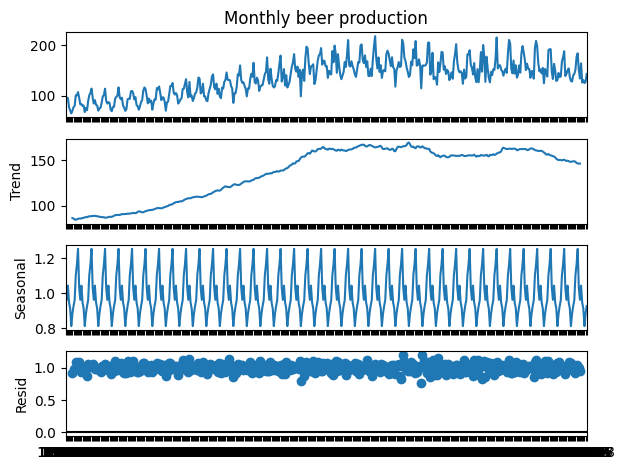

In [37]:
series = y_train
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.show()

Holt exponential with damping

In [ ]:
from ipywidgets import widgets
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error

def holt_both(alpha, beta, val, phi, dampness):
    holt = Holt(y_train, exponential=val, damped_trend=dampness)
    fit = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
    f_cast = fit.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    f_cast.plot(color='blue', label='Forecast')
    rmse = root_mean_squared_error(y_test, f_cast)
    plt.suptitle(f'RMSE = {rmse:.3f}, alpha = {alpha:.3f}, beta = {beta:.3f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(holt_both, alpha=(0.01, 1, 0.1), beta=(0.01, 1, 0.1), val=[True, False], phi=(0.01, 1, 0.1), dampness=[True, False])

interactive(children=(FloatSlider(value=0.41000000000000003, description='alpha', max=1.0, min=0.01), FloatSli…

<function __main__.holt_both(alpha, beta, val, phi, dampness)>

Holt Winter 

In [42]:
df = pd.read_csv('../Datasets/monthly-beer-production-in-austr.csv')
y_train = df['Monthly beer production'].iloc[:-12]
y_test = df['Monthly beer production'].iloc[-12:]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_winter(alpha, beta, gamma, seasonality, period=12):
    holt = ExponentialSmoothing(y_train, trend='add', seasonal=seasonality, seasonal_periods=period)
    fit = holt.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    f_cast = fit.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    f_cast.plot(color='blue', label='Forecast')
    rmse = root_mean_squared_error(y_test, f_cast)
    plt.suptitle(f'RMSE = {rmse:.3f}, alpha = {alpha:.2f}, beta = {beta:.2f}, gamma = {gamma:.2f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(holt_winter, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01), gamma=(0.01, 1, 0.01), seasonality=['add', 'mul'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_winter(alpha, beta, gamma, seasonality, period=12)>

In [ ]:
holt = ExponentialSmoothing(y_train)
fit = holt.fit()
holt.get_params()

AttributeError: 'ExponentialSmoothing' object has no attribute 'get_params'